In [1]:
import pickle
import numpy as np
import pandas as pd
from upsetplot import plot, generate_counts, from_memberships, UpSet, from_indicators
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.linewidth':1})
from itertools import combinations
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
sub_ses = [['SD010','01'],
           ['SD011','01'],
           ['SD012','02'],
           ['SD017','01'],
           ['SD018','01'],
           ['SD019','01'],
           ['SD021','01'],
           ['SD022','01']]
bands = ['d','th','a','b','g','hg']
bands3 = ['5_d','4_th','3_a','2_b','1_g','0_hg']
ldic = {'d': 'δ',
        'th': 'θ',
        'a': 'α',
        'b': 'β',
        'g': 'γ',
        'hg': 'High γ'}
ndic = {'d': '0',
        'th': '1',
        'a': '2',
        'b': '3',
        'g': '4',
        'hg': '5'}

### S6: Channels common across comparisons

In [3]:
colors = ['red','pink','chocolate','bisque','dodgerblue','lightblue']
dics2 = [sig_t_dic, sig_psd_dic, sig_plz_dic]
dname = ['tap','past','plural']
colors2 = ['blue','red','green']

In [3]:
pl_ch_dic = pickle.load(open('Figure-S6-S7-S8/reviewers-short-baseline_sig_chs_all_bands_plural-z_v2.pkl','rb'))
pst_ch_dic = pickle.load(open('Figure-S6-S7-S8/reviewers-short-baseline_sig_chs_all_bands_past-d_v2.pkl','rb'))
tap_ch_dic = pickle.load(open('Figure-S6-S7-S8/reviewers-short-baseline_sig_chs_all_bands_tap-t_v2.pkl','rb'))

In [4]:
pl, pst, tap = [],[],[]
pl_pst, tap_pst, pl_tap, all_comps = [],[],[],[]
for idx, band in enumerate(bands):    
    pl.append((bands3[idx],[ch for sub, ses in sub_ses\
                for ch in list(pl_ch_dic[band]['sig_etics'][sub])]))

    pst.append((bands3[idx],[ch for sub, ses in sub_ses\
                for ch in list(pst_ch_dic[band]['sig_etics'][sub])]))

    tap.append((bands3[idx],[ch for sub, ses in sub_ses\
                for ch in list(tap_ch_dic[band]['sig_ology'][sub])]))
    
    pl_pst.append((bands3[idx], [ch for sub, ses in sub_ses\
                   for ch in list(pl_ch_dic[band]['sig_etics'][sub]) if ch in list(pst_ch_dic[band]['sig_etics'][sub])]))

    tap_pst.append((bands3[idx], [ch for sub, ses in sub_ses\
                    for ch in list(tap_ch_dic[band]['sig_ology'][sub]) if ch in list(pst_ch_dic[band]['sig_etics'][sub])]))

    pl_tap.append((bands3[idx], [ch for sub, ses in sub_ses\
                    for ch in list(pl_ch_dic[band]['sig_etics'][sub]) if ch in list(tap_ch_dic[band]['sig_ology'][sub])]))

    all_comps.append((bands3[idx], [ch for sub, ses in sub_ses\
                     for ch in list(pl_ch_dic[band]['sig_etics'][sub]) if ch in list(pst_ch_dic[band]['sig_etics'][sub])\
                     if ch in list(tap_ch_dic[band]['sig_ology'][sub])]))

In [5]:
com_list = [pl,pst,tap,pl_pst,tap_pst,pl_tap,all_comps]
com_list_lists = [['pl'],['pst'],['tap'],['pl','pst'],['tap','pst'],['pl','tap'],['pl','pst','tap']]
ch_list = np.hstack([np.hstack(x[1]) for com in com_list for x in com if len(x[1])>0])
com_name_list = [com_list_lists[i] for i, com in enumerate(com_list) for x in com for y in x[1]]
band_list = []
for com in com_list:
    for sublist in com:
        for x in range(len(sublist[1])):
            band_list.append(sublist[0])
            
pl_list = np.array([1 if 'pl' in x else 0 for x in com_name_list]).astype(bool)
pst_list = np.array([1 if 'pst' in x else 0 for x in com_name_list]).astype(bool)
tap_list = np.array([1 if 'tap' in x else 0 for x in com_name_list]).astype(bool)

d = np.array([True if 'd' in x else False for x in band_list]).astype(bool)
th = np.array([True if 'th' in x else False for x in band_list]).astype(bool)
a = np.array([True if 'a' in x else False for x in band_list]).astype(bool)
b = np.array([True if 'b' in x else False for x in band_list]).astype(bool)
g = np.array([True if 'g' in x else False for x in band_list]).astype(bool)
hg = np.array([True if 'hg' in x else False for x in band_list]).astype(bool)

df = pd.DataFrame(np.vstack((pl_list, pst_list, tap_list, ch_list, band_list)).T, columns = ['pl','pst','tap', 'ch','band'])
df_up = df.groupby(['pl','pst','tap','band']).size()

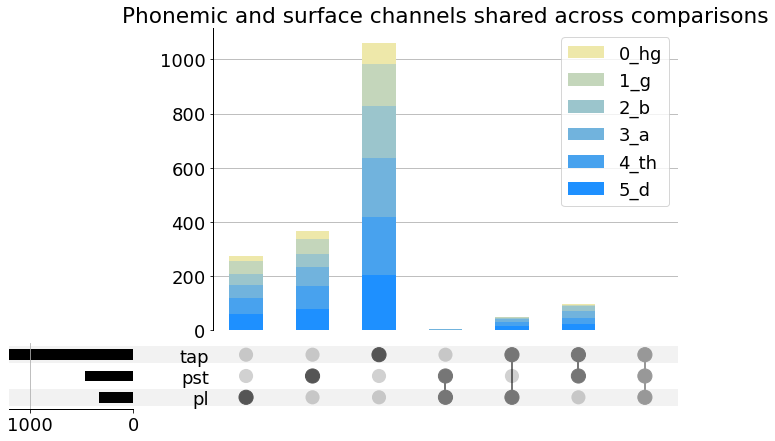

In [6]:
df_up = df.set_index(df.pl=='True').set_index(df.pst=='True', append=True).set_index(df.tap=='True', append=True)
nodes = [0.0, 0.5, 1.0]
colors = ["black", "darkgrey", "silver"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
colors2 = ['palegoldenrod','dodgerblue']
anchors = [0.0, 1.0]
cmap3 = LinearSegmentedColormap.from_list("mycmap2", list(zip(anchors, colors2)))

fig = plt.figure(figsize=(12, 7))
us = UpSet(df_up, intersection_plot_elements=0, element_size=None,sort_categories_by=None, subset_size='count')
us.add_stacked_bars(by=['band'],colors=[cmap3(0.0),cmap3(0.2),cmap3(0.4),cmap3(0.6),cmap3(0.8),cmap3(1.0)], elements=12)
us.style_subsets(min_degree=0, max_degree=0, facecolor=cmap2(0.0))
us.style_subsets(min_degree=1, max_degree=1, facecolor=cmap2(0.25))
us.style_subsets(min_degree=2, max_degree=2, facecolor=cmap2(0.35))
us.style_subsets(min_degree=3, max_degree=3, facecolor=cmap2(0.45))
us.style_subsets(min_degree=4, max_degree=4, facecolor=cmap2(0.65))
us.style_subsets(min_degree=5, max_degree=5, facecolor=cmap2(0.85))
us.style_subsets(min_degree=6, max_degree=6, facecolor=cmap2(1.0))

us.plot(fig=fig)

plt.title('Phonemic and surface channels shared across comparisons')
plt.show()

### S8c: Plural Comparison

In [7]:
special_ch_dic = pickle.load(open('Figure-S6-S7-S8/reviewers-short-baseline_sig_chs_all_bands_plural-z_v2.pkl','rb'))
band_chs, eband_chs, both_chs = {}, {}, {}
for band in bands:
    band_chs[band] = {}
    eband_chs[band] = {}
    both_chs[band] ={}
    for sub, ses in sub_ses:
        band_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_ology'][sub] if ch not in special_ch_dic[band]['sig_etics'][sub]]
        eband_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_etics'][sub] if ch not in special_ch_dic[band]['sig_ology'][sub]]
        both_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_etics'][sub] if ch in special_ch_dic[band]['sig_ology'][sub]]

In [8]:
com_list, both_com = [], []
ch_list, ech_list, both_list = [], [], []
for i in range(len(bands)+1):
    if i == 0: 
        continue
    if i == 1: 
        for [a] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub]]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub]]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub]]
            com_list.append([a])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a])
            both_list.append(boths)
    if i == 2:
        for [a, b] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub])]
            com_list.append([a,b])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b])
            both_list.append(boths)
    if i == 3:
        for [a, b, c] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub])]
            com_list.append([a,b,c])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c])
            both_list.append(boths)
    if i == 4:
        for [a, b, c, d] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub]) and \
                                                                                (x in eband_chs[d][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub]) and \
                                                                                (x in both_chs[d][sub])]
            com_list.append([a,b,c,d])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c,d])
            both_list.append(boths)
    if i == 5:
        for [a, b, c, d, e] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub]) and \
                                                                                (x in band_chs[e][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub]) and \
                                                                                (x in eband_chs[d][sub]) and \
                                                                                (x in eband_chs[e][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub]) and \
                                                                                (x in both_chs[d][sub]) and \
                                                                                (x in both_chs[e][sub])]
            com_list.append([a,b,c,d,e])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c,d,e])
            both_list.append(boths)
    if i == 6: 
        chs = [x for sub in band_chs['d'].keys() for x in band_chs['d'][sub] if (x in band_chs['th'][sub]) and \
                                                                                (x in band_chs['a'][sub]) and \
                                                                                (x in band_chs['b'][sub]) and \
                                                                                (x in band_chs['g'][sub]) and \
                                                                                (x in band_chs['hg'][sub])]
        echs = [x for sub in eband_chs['d'].keys() for x in eband_chs['d'][sub] if (x in eband_chs['th'][sub]) and \
                                                                                (x in eband_chs['a'][sub]) and \
                                                                                (x in eband_chs['b'][sub]) and \
                                                                                (x in eband_chs['g'][sub]) and \
                                                                                (x in eband_chs['hg'][sub])]
        boths = [x for sub in both_chs['d'].keys() for x in both_chs['d'][sub] if (x in both_chs['th'][sub]) and \
                                                                                (x in both_chs['a'][sub]) and \
                                                                                (x in both_chs['b'][sub]) and \
                                                                                (x in both_chs['g'][sub]) and \
                                                                                (x in both_chs['hg'][sub])]
        com_list.append(bands)
        ch_list.append(chs)
        ech_list.append(echs)
        both_com.append(bands)
        both_list.append(boths)

In [9]:
com_list2 = np.hstack((com_list, com_list, com_list))
d = np.array([True if 'd' in x else False for x in com_list2]).astype(bool)
th = np.array([True if 'th' in x else False for x in com_list2]).astype(bool)
a = np.array([True if 'a' in x else False for x in com_list2]).astype(bool)
b = np.array([True if 'b' in x else False for x in com_list2]).astype(bool)
g = np.array([True if 'g' in x else False for x in com_list2]).astype(bool)
hg = np.array([True if 'hg' in x else False for x in com_list2]).astype(bool)

ch_list2 = np.hstack((ch_list, ech_list, both_list))
class_list2 = np.hstack(([0 for x in range(63)], [1 for x in range(63)], [2 for x in range(63)]))
ccc = np.vstack((com_list2, ch_list2, class_list2))
df = pd.DataFrame(np.vstack((d, th, a, b, g, hg, [len(x) for x in ch_list2], class_list2)).T, columns = ['d', 'th', 'a','b','g','hg','ch','class'])
df = df[df['ch']>0]

/home/acmai/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


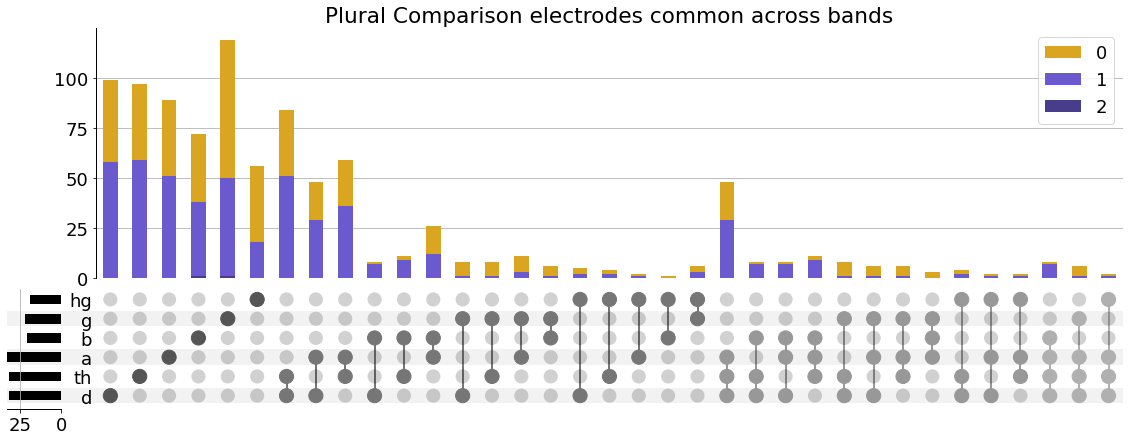

In [10]:
example = from_memberships([[ndic[x] for x in com] for com in com_list2], data=[len(x) for x in ch_list2])
example = example.sort_index()
example = from_indicators(indicators=df[['d','th','a','b','g','hg','class']].astype(bool), data = df['ch'])
df = df.set_index(df.d == 1).set_index(df.th == 1, \
                                       append=True).set_index(df.a == 1, \
                                        append=True).set_index(df.b == 1, \
                                        append=True).set_index(df.g == 1, \
                                         append=True).set_index(df.hg == 1, \
                                          append=True)

nodes = [0.0, 0.5, 1.0]
colors = ["black", "darkgrey", "silver"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

fig = plt.figure(figsize=(20, 7))
us = UpSet(df, intersection_plot_elements=0, element_size=None, sort_categories_by=None, min_subset_size=1)
us.add_stacked_bars(by='class',sum_over='ch',colors=['goldenrod','slateblue','darkslateblue'], elements=12)
us.style_subsets(min_degree=0, max_degree=0, facecolor=cmap2(0.0))
us.style_subsets(min_degree=1, max_degree=1, facecolor=cmap2(0.25))
us.style_subsets(min_degree=2, max_degree=2, facecolor=cmap2(0.35))
us.style_subsets(min_degree=3, max_degree=3, facecolor=cmap2(0.45))
us.style_subsets(min_degree=4, max_degree=4, facecolor=cmap2(0.65))
us.style_subsets(min_degree=5, max_degree=5, facecolor=cmap2(0.85))
us.style_subsets(min_degree=6, max_degree=6, facecolor=cmap2(1.0))
us.style_subsets(label=['phonemic','acoustic'])

us.plot(fig=fig)

plt.title('Plural Comparison electrodes common across bands')
plt.show()

### S8b: Past Comparison

In [11]:
special_ch_dic = pickle.load(open('Figure-S6-S7-S8/reviewers-short-baseline_sig_chs_all_bands_past-d_v2.pkl','rb'))
band_chs, eband_chs, both_chs = {}, {}, {}
for band in bands:
    band_chs[band] = {}
    eband_chs[band] = {}
    both_chs[band] = {}
    for sub, ses in sub_ses:
        band_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_ology'][sub] if ch not in special_ch_dic[band]['sig_etics'][sub]]
        eband_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_etics'][sub] if ch not in special_ch_dic[band]['sig_ology'][sub]]
        both_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_etics'][sub] if ch in special_ch_dic[band]['sig_ology'][sub]]

In [12]:
com_list, both_com = [], []
ch_list, ech_list, both_list = [], [], []
for i in range(len(bands)+1):
    if i == 0: 
        continue
    if i == 1: 
        for [a] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub]]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub]]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub]]
            com_list.append([a])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a])
            both_list.append(boths)
    if i == 2:
        for [a, b] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub])]
            com_list.append([a,b])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b])
            both_list.append(boths)
    if i == 3:
        for [a, b, c] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub])]
            com_list.append([a,b,c])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c])
            both_list.append(boths)
    if i == 4:
        for [a, b, c, d] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub]) and \
                                                                                (x in eband_chs[d][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub]) and \
                                                                                (x in both_chs[d][sub])]
            com_list.append([a,b,c,d])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c,d])
            both_list.append(boths)
    if i == 5:
        for [a, b, c, d, e] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub]) and \
                                                                                (x in band_chs[e][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub]) and \
                                                                                (x in eband_chs[d][sub]) and \
                                                                                (x in eband_chs[e][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub]) and \
                                                                                (x in both_chs[d][sub]) and \
                                                                                (x in both_chs[e][sub])]
            com_list.append([a,b,c,d,e])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c,d,e])
            both_list.append(boths)
    if i == 6: 
        chs = [x for sub in band_chs['d'].keys() for x in band_chs['d'][sub] if (x in band_chs['th'][sub]) and \
                                                                                (x in band_chs['a'][sub]) and \
                                                                                (x in band_chs['b'][sub]) and \
                                                                                (x in band_chs['g'][sub]) and \
                                                                                (x in band_chs['hg'][sub])]
        echs = [x for sub in eband_chs['d'].keys() for x in eband_chs['d'][sub] if (x in eband_chs['th'][sub]) and \
                                                                                (x in eband_chs['a'][sub]) and \
                                                                                (x in eband_chs['b'][sub]) and \
                                                                                (x in eband_chs['g'][sub]) and \
                                                                                (x in eband_chs['hg'][sub])]
        boths = [x for sub in both_chs['d'].keys() for x in both_chs['d'][sub] if (x in both_chs['th'][sub]) and \
                                                                                (x in both_chs['a'][sub]) and \
                                                                                (x in both_chs['b'][sub]) and \
                                                                                (x in both_chs['g'][sub]) and \
                                                                                (x in both_chs['hg'][sub])]
        com_list.append(bands)
        ch_list.append(chs)
        ech_list.append(echs)
        both_com.append(bands)
        both_list.append(boths)

In [13]:
com_list2 = np.hstack((com_list, com_list, com_list))
d = np.array([True if 'd' in x else False for x in com_list2]).astype(bool)
th = np.array([True if 'th' in x else False for x in com_list2]).astype(bool)
a = np.array([True if 'a' in x else False for x in com_list2]).astype(bool)
b = np.array([True if 'b' in x else False for x in com_list2]).astype(bool)
g = np.array([True if 'g' in x else False for x in com_list2]).astype(bool)
hg = np.array([True if 'hg' in x else False for x in com_list2]).astype(bool)

ch_list2 = np.hstack((ch_list, ech_list, both_list))
class_list2 = np.hstack(([0 for x in range(63)], [1 for x in range(63)], [2 for x in range(63)]))
ccc = np.vstack((com_list2, ch_list2, class_list2))
df = pd.DataFrame(np.vstack((d, th, a, b, g, hg, [len(x) for x in ch_list2], class_list2)).T, columns = ['d', 'th', 'a','b','g','hg','ch','class'])
df = df[df['ch']>0]

/home/acmai/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


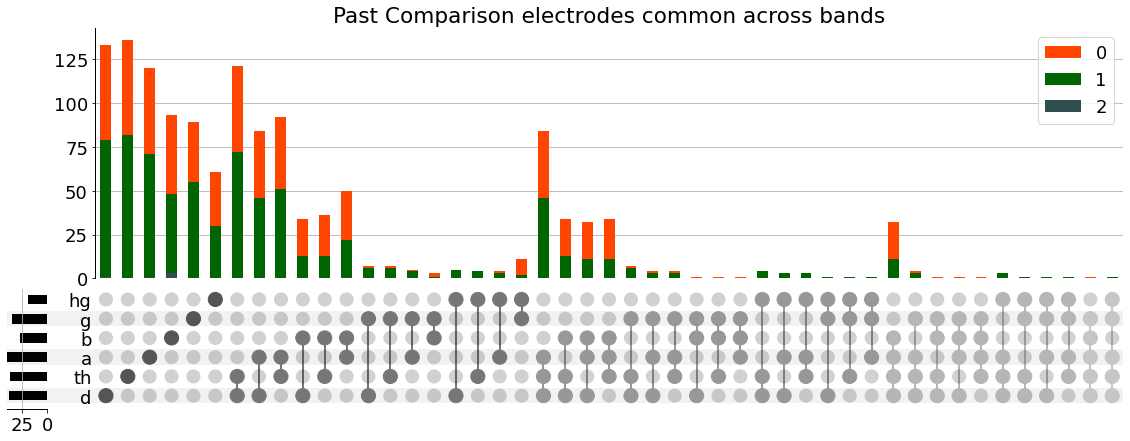

In [14]:
example = from_memberships([[ndic[x] for x in com] for com in com_list2], data=[len(x) for x in ch_list2])
example = example.sort_index()
example = from_indicators(indicators=df[['d','th','a','b','g','hg','class']].astype(bool), data = df['ch'])
df = df.set_index(df.d == 1).set_index(df.th == 1, \
                                       append=True).set_index(df.a == 1, \
                                                              append=True).set_index(df.b == 1, \
                                                                                     append=True).set_index(df.g == 1, \
                                                                                                            append=True).set_index(df.hg == 1, \
                                                                                                                                   append=True)

nodes = [0.0, 0.5, 1.0]
colors = ["black", "darkgrey", "lightgrey"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

fig = plt.figure(figsize=(20, 7))
us = UpSet(df, intersection_plot_elements=0, element_size=None, sort_categories_by=None, min_subset_size=1)
us.add_stacked_bars(by='class',sum_over='ch',colors=['orangered','darkgreen','darkslategrey'], elements=12)
us.style_subsets(min_degree=0, max_degree=0, facecolor=cmap2(0.0))
us.style_subsets(min_degree=1, max_degree=1, facecolor=cmap2(0.25))
us.style_subsets(min_degree=2, max_degree=2, facecolor=cmap2(0.35))
us.style_subsets(min_degree=3, max_degree=3, facecolor=cmap2(0.45))
us.style_subsets(min_degree=4, max_degree=4, facecolor=cmap2(0.65))
us.style_subsets(min_degree=5, max_degree=5, facecolor=cmap2(0.85))
us.style_subsets(min_degree=6, max_degree=6, facecolor=cmap2(1.0))
us.style_subsets(label=['phonemic','acoustic'])

us.plot(fig=fig) 

plt.title('Past Comparison electrodes common across bands')
plt.show()

### S8a: Tap Comparison

In [15]:
special_ch_dic = pickle.load(open('Figure-S6-S7-S8/reviewers-short-baseline_sig_chs_all_bands_tap-t_v2.pkl','rb'))
band_chs, eband_chs, both_chs = {}, {}, {}
for band in bands:
    band_chs[band] = {}
    eband_chs[band] = {}
    both_chs[band] = {}
    for sub, ses in sub_ses:
        band_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_ology'][sub] if ch not in special_ch_dic[band]['sig_etics'][sub]]
        eband_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_etics'][sub] if ch not in special_ch_dic[band]['sig_ology'][sub]]
        both_chs[band][sub] = [ch for ch in special_ch_dic[band]['sig_etics'][sub] if ch in special_ch_dic[band]['sig_ology'][sub]]

In [16]:
com_list, both_com = [], []
ch_list, ech_list, both_list = [], [], []
for i in range(len(bands)+1):
    if i == 0: 
        continue
    if i == 1: 
        for [a] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub]]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub]]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub]]
            com_list.append([a])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a])
            both_list.append(boths)
    if i == 2:
        for [a, b] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub])]
            com_list.append([a,b])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b])
            both_list.append(boths)
    if i == 3:
        for [a, b, c] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub])]
            com_list.append([a,b,c])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c])
            both_list.append(boths)
    if i == 4:
        for [a, b, c, d] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub]) and \
                                                                                (x in eband_chs[d][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub]) and \
                                                                                (x in both_chs[d][sub])]
            com_list.append([a,b,c,d])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c,d])
            both_list.append(boths)
    if i == 5:
        for [a, b, c, d, e] in [list(com) for com in combinations(bands, i)]:
            chs = [x for sub in band_chs[a].keys() for x in band_chs[a][sub] if (x in band_chs[b][sub]) and \
                                                                                (x in band_chs[c][sub]) and \
                                                                                (x in band_chs[d][sub]) and \
                                                                                (x in band_chs[e][sub])]
            echs = [x for sub in eband_chs[a].keys() for x in eband_chs[a][sub] if (x in eband_chs[b][sub]) and \
                                                                                (x in eband_chs[c][sub]) and \
                                                                                (x in eband_chs[d][sub]) and \
                                                                                (x in eband_chs[e][sub])]
            boths = [x for sub in both_chs[a].keys() for x in both_chs[a][sub] if (x in both_chs[b][sub]) and \
                                                                                (x in both_chs[c][sub]) and \
                                                                                (x in both_chs[d][sub]) and \
                                                                                (x in both_chs[e][sub])]
            com_list.append([a,b,c,d,e])
            ch_list.append(chs)
            ech_list.append(echs)
            both_com.append([a,b,c,d,e])
            both_list.append(boths)
    if i == 6: 
        chs = [x for sub in band_chs['d'].keys() for x in band_chs['d'][sub] if (x in band_chs['th'][sub]) and \
                                                                                (x in band_chs['a'][sub]) and \
                                                                                (x in band_chs['b'][sub]) and \
                                                                                (x in band_chs['g'][sub]) and \
                                                                                (x in band_chs['hg'][sub])]
        echs = [x for sub in eband_chs['d'].keys() for x in eband_chs['d'][sub] if (x in eband_chs['th'][sub]) and \
                                                                                (x in eband_chs['a'][sub]) and \
                                                                                (x in eband_chs['b'][sub]) and \
                                                                                (x in eband_chs['g'][sub]) and \
                                                                                (x in eband_chs['hg'][sub])]
        boths = [x for sub in both_chs['d'].keys() for x in both_chs['d'][sub] if (x in both_chs['th'][sub]) and \
                                                                                (x in both_chs['a'][sub]) and \
                                                                                (x in both_chs['b'][sub]) and \
                                                                                (x in both_chs['g'][sub]) and \
                                                                                (x in both_chs['hg'][sub])]
        com_list.append(bands)
        ch_list.append(chs)
        ech_list.append(echs)
        both_com.append(bands)
        both_list.append(boths)

In [17]:
com_list2 = np.hstack((com_list, com_list, com_list))
d = np.array([True if 'd' in x else False for x in com_list2]).astype(bool)
th = np.array([True if 'th' in x else False for x in com_list2]).astype(bool)
a = np.array([True if 'a' in x else False for x in com_list2]).astype(bool)
b = np.array([True if 'b' in x else False for x in com_list2]).astype(bool)
g = np.array([True if 'g' in x else False for x in com_list2]).astype(bool)
hg = np.array([True if 'hg' in x else False for x in com_list2]).astype(bool)

ch_list2 = np.hstack((ch_list, ech_list, both_list))
class_list2 = np.hstack(([0 for x in range(63)], [1 for x in range(63)], [2 for x in range(63)]))
ccc = np.vstack((com_list2, ch_list2, class_list2))
df = pd.DataFrame(np.vstack((d, th, a, b, g, hg, [len(x) for x in ch_list2], class_list2)).T, columns = ['d', 'th', 'a','b','g','hg','ch','class'])
df = df[df['ch']>0]

/home/acmai/anaconda3/envs/mne/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


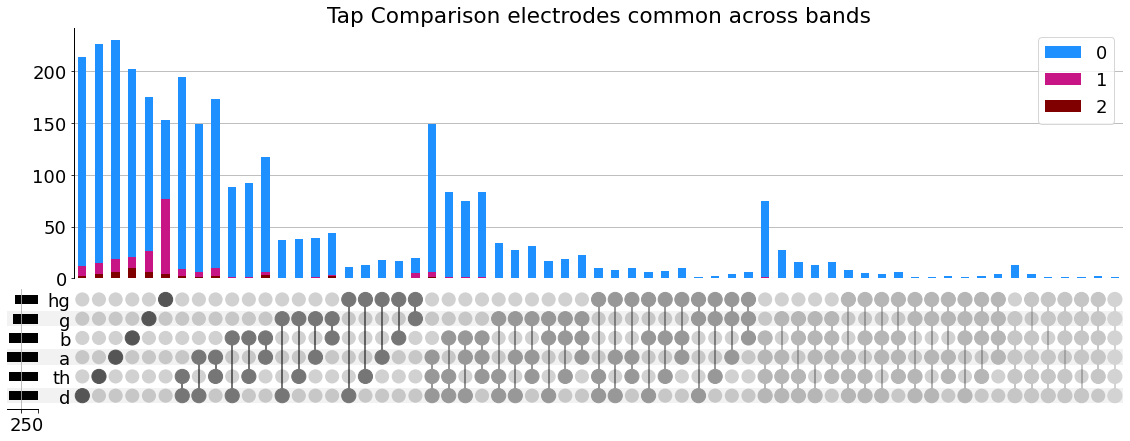

In [18]:
df = df.set_index(df.d == 1).set_index(df.th == 1, \
                                       append=True).set_index(df.a == 1, \
                                                              append=True).set_index(df.b == 1, \
                                                                                     append=True).set_index(df.g == 1, \
                                                                                                            append=True).set_index(df.hg == 1, \
                                                                                                                                   append=True)

nodes = [0.0, 0.5, 1.0]
colors = ["black", "darkgrey", "lightgrey"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

fig = plt.figure(figsize=(20, 7))
us = UpSet(df, intersection_plot_elements=0, element_size=None, sort_categories_by=None, min_subset_size=1)
us.add_stacked_bars(by='class',sum_over='ch',colors=['dodgerblue','mediumvioletred', 'maroon'], elements=12)
us.style_subsets(min_degree=0, max_degree=0, facecolor=cmap2(0.0))
us.style_subsets(min_degree=1, max_degree=1, facecolor=cmap2(0.25))
us.style_subsets(min_degree=2, max_degree=2, facecolor=cmap2(0.35))
us.style_subsets(min_degree=3, max_degree=3, facecolor=cmap2(0.45))
us.style_subsets(min_degree=4, max_degree=4, facecolor=cmap2(0.65))
us.style_subsets(min_degree=5, max_degree=5, facecolor=cmap2(0.85))
us.style_subsets(min_degree=6, max_degree=6, facecolor=cmap2(1.0))
us.style_subsets(label=['phonemic','acoustic'])

us.plot(fig=fig) #fig=fig, element_size=None, sort_categories_by=None, intersection_plot_elements=10)

plt.title('Tap Comparison electrodes common across bands')
plt.show()